In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Imran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Imran\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import tensorflow as tf
import seaborn as sns
from sklearn.utils import shuffle
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'C:\Users\Imran\Documents\DATA SCIENCE\Python Basics\imran\End to End Project\NLP\Twitter Sentiments analysis\twitter_training.csv')

In [5]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
df_val = pd.read_csv(r'C:\Users\Imran\Documents\DATA SCIENCE\Python Basics\imran\End to End Project\NLP\Twitter Sentiments analysis\twitter_validation.csv')

In [7]:
df_val

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [8]:
df = shuffle(df)

In [9]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
1491,2661,Borderlands,Neutral,So can ’ t play borderlands tell sorry everyone
68183,3677,Cyberpunk2077,Neutral,Cyberpunk 2077 Dev Talks Microtransactions -- ...
33330,6522,Fortnite,Negative,@ FortniteGame we need to fix these crashes ou...
65588,6832,johnson&johnson,Positive,Imagine Johnson & Johnson (Sudafed) would be t...
21551,4089,CS-GO,Irrelevant,Tbh valorant is csgo on ez mode this is like m...
...,...,...,...,...
57761,11506,TomClancysRainbowSix,Negative,@Rainbow6Game Can you guys please fix the rubb...
2466,1631,CallOfDutyBlackopsColdWar,Positive,The new @ CallofDuty
44594,11659,Verizon,Negative,@Verizon can you help me with an Apple watch o...
71242,11003,TomClancysGhostRecon,Negative,Just removed here for the first time in months...


In [10]:
df.columns = ['Tweet ID','entity','sentiment','Tweet Content']

In [11]:
df

,Tweet ID,entity,sentiment,Tweet Content
1491,2661,Borderlands,Neutral,So can ’ t play borderlands tell sorry everyone
68183,3677,Cyberpunk2077,Neutral,Cyberpunk 2077 Dev Talks Microtransactions -- ...
33330,6522,Fortnite,Negative,@ FortniteGame we need to fix these crashes ou...
65588,6832,johnson&johnson,Positive,Imagine Johnson & Johnson (Sudafed) would be t...
21551,4089,CS-GO,Irrelevant,Tbh valorant is csgo on ez mode this is like m...
...,...,...,...,...
57761,11506,TomClancysRainbowSix,Negative,@Rainbow6Game Can you guys please fix the rubb...
2466,1631,CallOfDutyBlackopsColdWar,Positive,The new @ CallofDuty
44594,11659,Verizon,Negative,@Verizon can you help me with an Apple watch o...
71242,11003,TomClancysGhostRecon,Negative,Just removed here for the first time in months...


In [12]:
df_val.columns = ['Tweet ID','entity','sentiment','Tweet Content']

In [13]:
df_val

,Tweet ID,entity,sentiment,Tweet Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
df.sentiment.value_counts()

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: sentiment, dtype: int64

In [15]:
df.entity.value_counts

<bound method IndexOpsMixin.value_counts of 1491                   Borderlands
68183                Cyberpunk2077
33330                     Fortnite
65588              johnson&johnson
21551                        CS-GO
                   ...            
57761         TomClancysRainbowSix
2466     CallOfDutyBlackopsColdWar
44594                      Verizon
71242         TomClancysGhostRecon
53900                   CallOfDuty
Name: entity, Length: 74681, dtype: object>

In [16]:
df = df[df['sentiment'] != 'Irrelevant']

In [17]:
df.sentiment.value_counts()

Negative    22542
Positive    20831
Neutral     18318
Name: sentiment, dtype: int64

In [18]:
df.drop(columns=['Tweet ID','entity'],inplace=True)

In [19]:
df

,sentiment,Tweet Content
1491,Neutral,So can ’ t play borderlands tell sorry everyone
68183,Neutral,Cyberpunk 2077 Dev Talks Microtransactions -- ...
33330,Negative,@ FortniteGame we need to fix these crashes ou...
65588,Positive,Imagine Johnson & Johnson (Sudafed) would be t...
12097,Neutral,IT'S DROPPED JASON TERRY BATTLE - XBOX V PS4 V...
...,...,...
57761,Negative,@Rainbow6Game Can you guys please fix the rubb...
2466,Positive,The new @ CallofDuty
44594,Negative,@Verizon can you help me with an Apple watch o...
71242,Negative,Just removed here for the first time in months...


In [20]:
df_val = df_val[df_val['sentiment'] != 'Irrelevant']

In [21]:
df_val.isnull().sum()

Tweet ID         0
entity           0
sentiment        0
Tweet Content    0
dtype: int64

In [22]:
df_val.sentiment.value_counts()

Neutral     285
Positive    277
Negative    266
Name: sentiment, dtype: int64

In [23]:
df_val.drop(columns=['Tweet ID','entity'],inplace=True)

In [24]:
df_val

,sentiment,Tweet Content
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
992,Negative,Please explain how this is possible! How can t...
993,Positive,Good on Sony. As much as I want to see the new...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [25]:
df.isnull().sum()

sentiment          0
Tweet Content    571
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
Stopwords = stopwords.words('english')

In [28]:
Stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
Stopwords.remove('not')
Stopwords.remove('no')

In [30]:
Stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
sentences = df['Tweet Content'].values
len(sentences)

61120

In [32]:
labels = df['sentiment'].values
labels

array(['Neutral', 'Neutral', 'Negative', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

In [33]:
cleaned_sentences = []
final_labels = []
for i in range(len(sentences)):
    try:
        sent = re.sub('[^A-Za-z]',' ',sentences[i])
        sent = sent.lower()
        sent = nltk.word_tokenize(sent)
        ps = nltk.pos_tag(sent)
        sent = [i[0] for i in ps if i[1] == ('JJ' or 'VBP'or'VB')]
        sent = ' '.join(sent)
        if sent != '':
            cleaned_sentences.append(sentences[i])
            final_labels.append(labels[i])
        if i%10000==0:
            print('Count:',i)
    except:
        pass

Count: 0
Count: 10000
Count: 20000
Count: 30000
Count: 40000
Count: 50000
Count: 60000


In [34]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

cv = CountVectorizer()
x = cv.fit_transform(cleaned_sentences)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,final_labels,test_size=0.20,random_state=32)

from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()
nb_clf.fit(x_train,y_train)
y_pred = nb_clf.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score , confusion_matrix
print("Score",accuracy_score(y_pred,y_test))

print("F1-score",f1_score(y_pred,y_test,average='weighted'))



Score 0.8104175453395192
F1-score 0.8121609186219559


In [35]:
tf = TfidfVectorizer()

messages_tf = tf.fit_transform(cleaned_sentences)
X_train ,X_test,Y_train,Y_test = train_test_split(messages_tf,final_labels,test_size=0.2,random_state=32)

nb_clf_tf = MultinomialNB()

nb_clf_tf.fit(X_train,Y_train)

y_pred_tf = nb_clf_tf.predict(X_test)
print("Score",accuracy_score(y_pred_tf,Y_test))
print("F1-score",f1_score(y_pred_tf,Y_test,average='weighted'))

Score 0.8030366933783214
F1-score 0.8060826817247682


In [36]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer

In [37]:
for j , i in enumerate(final_labels):
    if i == 'Positive':
        final_labels[j]=0
    elif i == 'Negative':
        final_labels[j]=1
    else:
        final_labels[j]=2

In [38]:
import tensorflow as tf
final_labels = tf.keras.utils.to_categorical(final_labels,num_classes = 3)

In [39]:
final_labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [54]:
X_Train,X_Test_val,Y_Train,Y_Test_val = train_test_split(cleaned_sentences,final_labels,test_size=0.20,random_state=144)


In [55]:
X_Test,X_val,Y_Test,Y_val = train_test_split(X_Test_val,Y_Test_val,test_size=0.50,random_state=44)


In [56]:
num_words = 5000
tokenizer = Tokenizer(num_words=num_words,oov_token="<OOV>")
tokenizer.fit_on_texts(X_Train)

X_Train = tokenizer.texts_to_sequences(X_Train)
X_Test = tokenizer.texts_to_sequences(X_Test)
X_val = tokenizer.texts_to_sequences(X_val)

In [62]:
vocab_size = len(tokenizer.word_index)+1

max_len = 120
emb_dim = 100

X_Train = pad_sequences(X_Train,padding = 'post',maxlen = max_len)
X_Test = pad_sequences(X_Test,padding = 'post',maxlen=max_len)
X_val = pad_sequences(X_val,padding='post',maxlen = max_len)


In [86]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size,emb_dim,input_length=max_len),
                            tf.keras.layers.LSTM(50,dropout=0.25,recurrent_dropout=0.25),
                            tf.keras.layers.Dense(6,activation='relu'),
                            tf.keras.layers.Dense(3,activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 100)          2682600   
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense_4 (Dense)             (None, 6)                 306       
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 2,713,127
Trainable params: 2,713,127
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [88]:
epochs = 10
history = model.fit(X_Train,Y_Train,epochs = epochs,batch_size=32,validation_data=(X_val,Y_val))

Epoch 1/10
1186/1186 [==============================] - 280s 232ms/step - loss: 1.0975 - accuracy: 0.3529 - val_loss: 1.0962 - val_accuracy: 0.3714
Epoch 2/10
1186/1186 [==============================] - 272s 230ms/step - loss: 1.0970 - accuracy: 0.3581 - val_loss: 1.0958 - val_accuracy: 0.3714
Epoch 3/10
1186/1186 [==============================] - 302s 254ms/step - loss: 1.0970 - accuracy: 0.3578 - val_loss: 1.0960 - val_accuracy: 0.3714
Epoch 4/10
1186/1186 [==============================] - 282s 238ms/step - loss: 1.0971 - accuracy: 0.3581 - val_loss: 1.0963 - val_accuracy: 0.3714
Epoch 5/10
1186/1186 [==============================] - 277s 234ms/step - loss: 1.0970 - accuracy: 0.3580 - val_loss: 1.0959 - val_accuracy: 0.3714
Epoch 6/10
1186/1186 [==============================] - 279s 235ms/step - loss: 1.0970 - accuracy: 0.3581 - val_loss: 1.0961 - val_accuracy: 0.3714
Epoch 7/10
1186/1186 [==============================] - 283s 239ms/step - loss: 1.0970 - accuracy: 0.3581 - val_

In [89]:
model.save('sentiment_model.h5')

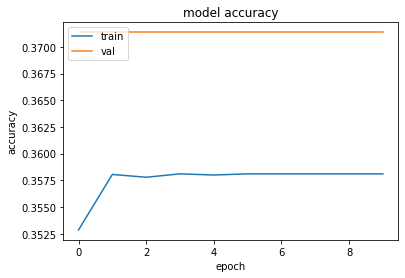

In [90]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

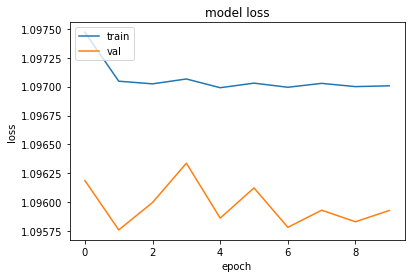

In [91]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [92]:
pred = model.predict(X_Test)

In [93]:
X_Test[0]

array([4530, 3243, 3944,    1,   28,   10,   94,   28,   26,   43,  306,
          9, 1027,   23, 2613,  113,   77,    7,  108, 3268,   64,    1,
         36,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [94]:
pred = np.argmax(pred,axis=1)
Y_Test = np.argmax(Y_Test,axis=1)


from sklearn.metrics import accuracy_score
accuracy_score(pred, Y_Test)

AxisError: axis 1 is out of bounds for array of dimension 1